<hr/>

# Data Mining

<hr/>

<h2><font color="darkblue">Exam 1</font></h2>

#### Deadline
Submit by 1:15pm on Blackboard. Don't wait till the last minute!

####  Work alone!
Feel free to use the lecture notes and other resources but work on your own!  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 1

Analyze the attached datasets using simple descriptive statistics; discuss their similarities and differences.

1. Run the code snipet below and look at the output (1 pt)
0. Understand and provide meaningful comments for each line (4 pts)
0. Calculate these quantities for each dataset (2 pts)
0. Make plots of these datasets (2 pts)
0. Summarize the results with your own words (2 pts)

Total of 11 points

In [31]:
import pandas as pd

df1 = pd.read_csv('E1-Problem1-I.csv')   #import CSV File   
df2 = pd.read_csv('E1-Problem1-II.csv')  #import CSV File
df3 = pd.read_csv('E1-Problem1-III.csv') #import CSV File

V = df1.as_matrix().T #assign data series df1 to matrix V and transpose matrix V
m = V.mean(axis=1)    # calculate the mean of the first column 
m = m[:,np.newaxis]   # reformat matrix into 2X1
M = V - m             # Difference of value to mean 
C = M.dot(M.T) / (M.shape[1] - 1)  #Calculate covariance of M matrix
print (m) #print m matrix
print (C) #print C matrix
df1       # print df1 data series

[[9.        ]
 [7.50090909]]
[[11.          5.501     ]
 [ 5.501       4.12726909]]


/Users/AkilanMeiyappan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [3]:
V2 = df2.as_matrix().T  #assign data series df1 to matrix V and transpose matrix V
m2 = V2.mean(axis=1)    # calculate the mean of the first column 
m2 = m2[:,np.newaxis]   # reformat matrix into 2X1
M2 = V2 - m2            # Difference of value to mean 
C2 = M2.dot(M2.T) / (M2.shape[1] - 1) #Calculate covariance of M matrix
print(m2) #print m2 matrix
print(C2) #print C2 matrix

[[9.        ]
 [7.50090909]]
[[11.          5.5       ]
 [ 5.5         4.12762909]]


/Users/AkilanMeiyappan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [5]:
V3 = df3.as_matrix().T  #assign data series df1 to matrix V and transpose matrix V
m3 = V3.mean(axis=1)    # calculate the mean of the first column 
m3 = m3[:,np.newaxis]   # reformat matrix into 2X1
M3 = V3 - m3            # Difference of value to mean 
C3 = M3.dot(M3.T) / (M3.shape[1] - 1) #Calculate covariance of M matrix
print(m3)      #print m3 matrix
print(C3)      #print C3 matrix

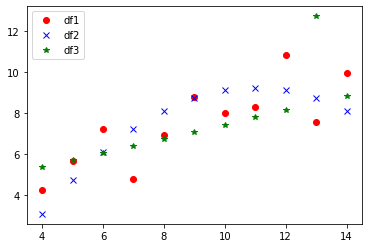

In [30]:
plt.plot(V[0,:],V[1,:],'ro',V2[0,:],V2[1,:],'bx',V3[0,:],V3[1,:],'g*', )
legend(['df1','df2','df3'])

### Problem 2

The attached [CSV](E1-Problem2.csv) file contains a number measurements. Considering that the measurements are expensive to perform, a student decided to estimate the relation of the two quantities and estimate the missing measurements.

1. Run and comment the code (3 pts)
0. Describe the method that the program implements and the underlying assumptions (2 pts)
0. What is the family of functions the student considered? What is the formula? (2 pts) 
0. What would be a better formula to use and why? (2 pts)
0. Change the code to implement your proposal and rerun the analysis (3 pts)
0. What value of *n* would be your preference and why? (2 pts)

Total of 14 points

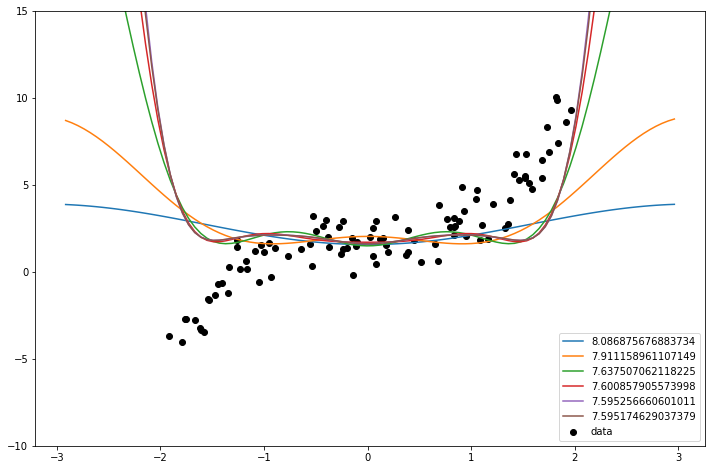

In [32]:
df = pd.read_csv("E1-Problem2.csv")  # read data in from CSV file
plt.figure(figsize=(12,8))           # create figure to display data set
plt.scatter(df.x, df.y, c='k', label='data') #display x and y columns as a Scatter Plot 

def ser(x, n):                          # define function ser
    X = np.ones( (x.size, n+1) )        # Create dummy matrix of ones with size [x,n+1]
    for i in range(1, n+1):      # for loop to iterate n+1 times
        X[:,i] = np.cos(i * x)   # take the cosine of the values of matrix x times the number of iterations and assign it to the Ith column of matrix X
    return X            # return matrix X to calling variable
    
xmin, xmax = df.x.min(), df.x.max() #assing xmin and xmax as min and max values of matrix X 
x = np.linspace(xmin-1, xmax+1, 100) # create a matrix x that rangers from 1 value less than x min to one value greater than x max, with a 100 equally spaced iterations 

for n in range(1,7):           # define for loop iterate 6 times
    X = ser(df.x, n)           # call function ser and pass thru variables x sereis from df and n 
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df.y) # calcualting Beta coefficients
    mse = np.square(X.dot(b)-df.y).mean()     #calculating mse
    y = ser(x,n).dot(b)  #Calling ser function and passing linspace function x and current iteration; taking dot product of output with respect to beta values
    plt.plot(x, y, '-', label=mse);     # plotting graphs 
    
plt.ylim(-10,15) 
plt.legend();

2. this code implements a linear regression model in order to best fit the data to a predefined function. An assumption for the method is that there is 
   somewhat of pattern to the data 
3. The code uses a trig family function to fit the data. Specifally a cosine function was used to fit the data
4. a better formula to use for this data set would be polynomial function 


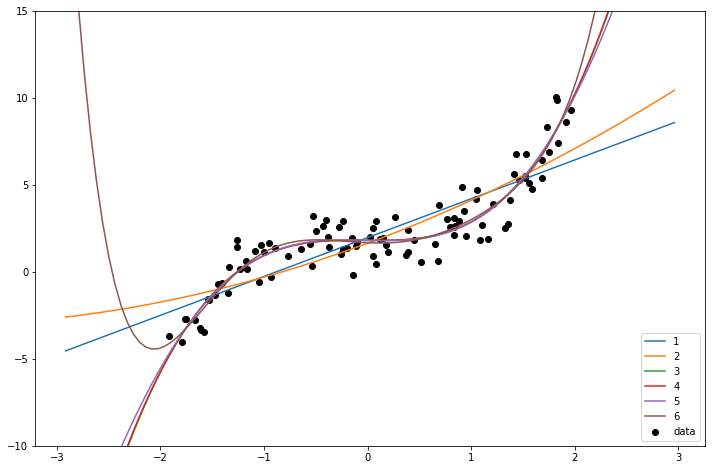

In [27]:
df = pd.read_csv("E1-Problem2.csv")  # read data in from CSV file
plt.figure(figsize=(12,8))           # create figure to display data set
plt.scatter(df.x, df.y, c='k', label='data') #display x and y columns as a Scatter Plot 

def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X
xmin, xmax = df.x.min(), df.x.max() #assing xmin and xmax as min and max values of matrix X 
x = np.linspace(xmin-1, xmax+1, 100) # create a matrix x that rangers from 1 value less than x min to one value greater than x max, with a 100 equally spaced iterations 

for n in range(1,7):           # define for loop iterate 6 times
    X = poly(df.x, n)           # call function ser and pass thru variables x sereis from df and n 
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df.y) # calcualting Beta coefficients
    mse = np.square(X.dot(b)-df.y).mean()     #calculating mse
    y = poly(x,n).dot(b)  #Calling ser function and passing linspace function x and current iteration; taking dot product of output with respect to beta values
    plt.plot(x, y, '-', label=n);     # plotting graphs 
    
plt.ylim(-10,15) 
plt.legend();

I would use n =3